### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  
from sklearn.model_selection import train_test_split 
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### Reading the input csv file

In [2]:
data=pd.read_csv("/content/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Checking the shape

In [3]:
data.shape

(600, 6)

### Checking for null values and the data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Checking duplicate value

In [5]:
data[data.duplicated(keep= False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


### Cheking for the normal distribution in the data using distplot

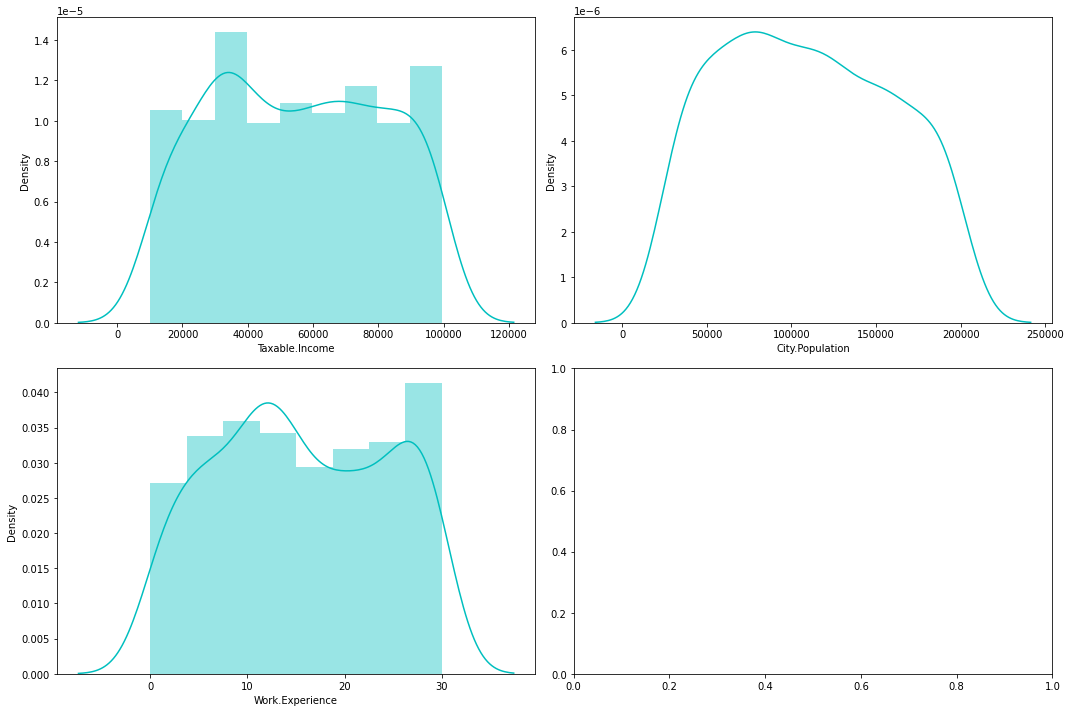

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

sns.distplot(data["Taxable.Income"], ax=ax[0,0],color='c')
sns.kdeplot(data["City.Population"], ax=ax[0,1],color='c')
sns.distplot(data["Work.Experience"], ax=ax[1,0],color='c')


plt.tight_layout()
plt.show()

### Converting all the categorical variable to numerical values using Label encoding

In [7]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [8]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


### Find the income above 30,000 and classifying the categories that are greater than 30,000, as people with higher income, subjected to taxation

In [9]:
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

### Dropping the taxable income column from the data, since it is the target variable, 'y'

In [10]:
x=data.drop(axis=1,columns="Taxable.Income")
y=data["Taxable.Income"]

### Splitting data into training and testing data set

In [11]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

### Build a decision tree classifier with gini index, for classifying the data in to risky or good taxable income

In [12]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Plot the decision tree

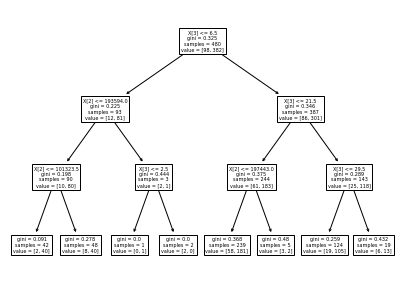

In [13]:
plt.figure(figsize=(7,5))
tree.plot_tree(model);

### Visualizing how the data is choosing the root node and how a decision tree classifier is built

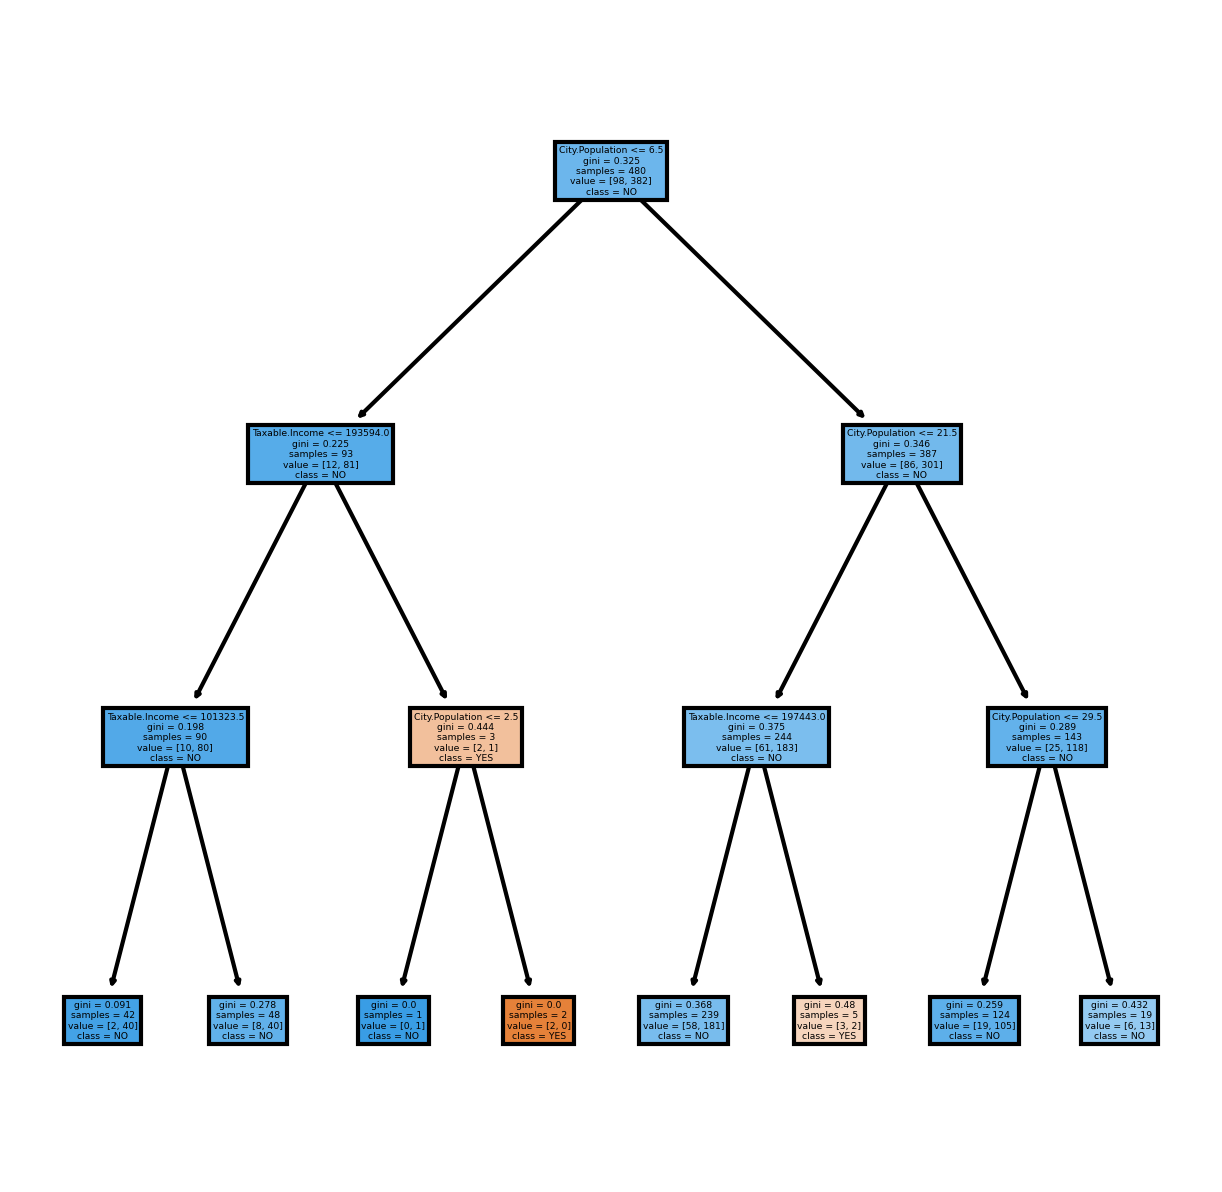

In [14]:
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience"]
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

### Fitting the data on teh model and checking the score for the training data

In [15]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8020833333333334

### Checking the score for test data

In [16]:

model.score(x_test, y_test)

0.7833333333333333

In [17]:
model.feature_importances_

array([0.        , 0.        , 0.61086184, 0.38913816, 0.        ])

### Predicting on the test data using the built Decision tree classifier model 

In [18]:
y_pred = model.predict(x_test)
y_pred
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.7833333333333333)

In [19]:
model.predict([[0,1,1,1,0]])

array([1])

### Predict the probbilities of each of the predicted classes

In [20]:
model.predict_proba(x_test)

array([[0.15322581, 0.84677419],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.16666667, 0.83333333],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.31578947, 0.68421053],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.04761905, 0.95238095],
       [0.24267782, 0.75732218],
       [0.31578947, 0.68421053],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.

### Evaluation metric - Confusion matrix

In [21]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 0, 26],
       [ 0, 94]])

Text(0.5, 1.0, 'Accuracy Score: 0.7833333333333333')

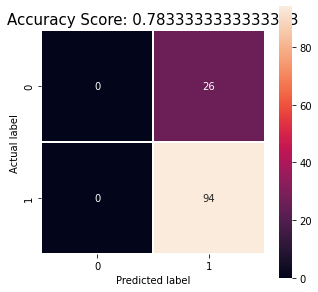

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

### Printing the Classification report using the Y_test data and the predicted data

In [23]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



### Creating a for loop to identify the train and test accuracies of the prediction, with the change in the max_depth feature of the decision tree classifier from 1 to 11

In [24]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

### Listing down the Accuracies in a Dataframe for different max depth classifiers

In [25]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.795833,0.783333
1,2,0.795833,0.783333
2,3,0.797917,0.783333
3,4,0.800000,0.783333
4,5,0.802083,0.775000
5,6,0.806250,0.775000
6,7,0.810417,0.766667
7,8,0.818750,0.741667
8,9,0.833333,0.750000
9,10,0.845833,0.750000


### Visualizing the accuracy graph, based on the max_depth

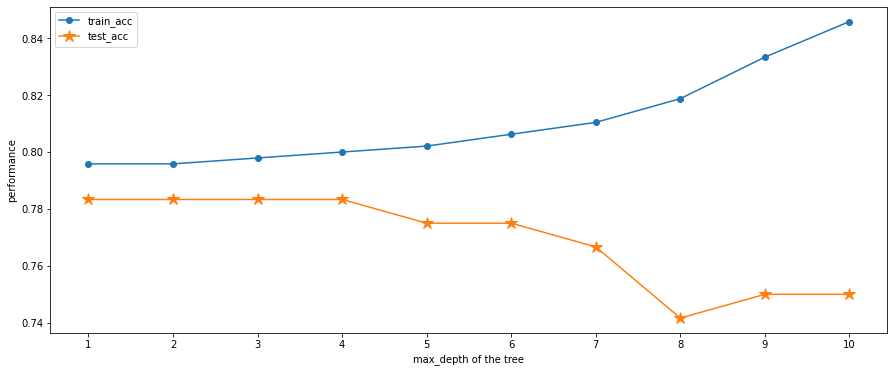

In [26]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'], marker = 'o')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = '*',markersize=12)
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

### Splitting the test and train data with a different train-test split

In [27]:
X=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

### Constructing a decision tree regressor model to predict the Salary classification

In [29]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### Finding the accuracy of the test data

In [30]:
model.score(X_test,y_test)

-0.869281045751634

## Conclusion:
### When the maximum depth of the decision tree is 1, 2, 3 or 4, the accuracy of the classsification algorithm gives 78.33%.
### It is also evident that a regression model is not usually the apt fit to classify a dataset.